# Clustering Crypto

In [167]:
# Initial imports
import pandas as pd
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### Deliverable 1: Preprocessing the Data for PCA

In [168]:
# Load the crypto_data.csv dataset.
file_path = "crypto_data.csv"
crypto_df = pd.read_csv(file_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [169]:
# Keep all the cryptocurrencies that are being traded.
trading = crypto_df['IsTrading'] == True
crypto_df = crypto_df[trading]
crypto_df['IsTrading'].unique()

array([ True])

In [170]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df['Algorithm'].isnull().sum()
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [171]:
# Remove the "IsTrading" column. 
crypto_df.drop(['IsTrading'], axis=1, inplace=True)
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [172]:
# Remove rows that have at least 1 null value.
crypto_df.dropna(inplace=True)
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [173]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] !=0]
crypto_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [174]:
crypto_df.set_index(('Unnamed: 0'), inplace=True)

In [175]:
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [176]:
# Create a new DataFrame that holds only the cryptocurrencies names.
cc_names_df = crypto_df.filter(['CoinName'], axis=1)
cc_names_df

,CoinName
Unnamed: 0,
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex


In [177]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df.drop(['CoinName'], axis=1, inplace=True)
crypto_df

C:\Users\cyrau\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [178]:
# Use get_dummies() to create variables for text features.
crypto_dfgd = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
crypto_dfgd

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
# Standardize the data with StandardScaler().
crypto_scaled = StandardScaler().fit_transform(crypto_dfgd)
crypto_scaled

array([[-0.11674788, -0.15286468, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.09358885, -0.14499604, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [ 0.52587231,  4.4937636 , -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       ...,
       [-0.09523411, -0.13215444, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11658774, -0.15255408, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ],
       [-0.11674507, -0.15284989, -0.0433555 , ..., -0.0433555 ,
        -0.0433555 , -0.0433555 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [180]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)
crypto_pca = pca.fit_transform(crypto_scaled)

In [181]:
# Create a DataFrame with the three principal components.
pcs_df = pd.DataFrame(data=crypto_pca, columns=('PC1', 'PC2', 'PC3'), index=crypto_dfgd.index)
pcs_df

,PC1,PC2,PC3
Unnamed: 0,,,
42,-0.337205,0.950445,-0.649438
404,-0.320508,0.950158,-0.649650
1337,2.316215,1.501818,-0.677480
BTC,-0.144392,-1.308455,0.216162
ETH,-0.154337,-1.970341,0.436033
...,...,...,...
ZEPH,2.464766,1.024466,-0.176426
GAP,-0.335246,0.950281,-0.649437
BDX,0.325284,-2.241211,0.491267


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

C:\Users\cyrau\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


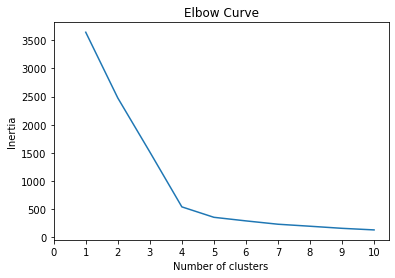

In [182]:
import matplotlib.pyplot as plt
# Create an elbow curve to find the best value for K.
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k: 
    km = KMeans(n_clusters= i, random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Creating the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Running K-Means with `k=4`

In [183]:
# Initialize the K-Means model.
model = KMeans(n_clusters= 4, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)
print(predictions)

[0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0
 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0
 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1
 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 3 3 1 1 1 0 3 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1
 0 0 0 0 1 0 0 1 0 0 1 3 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 1 0 

In [202]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = crypto_df.join(pcs_df, how='inner')


#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# YOUR CODE HERE
clustered_df['CoinName'] = cc_names_df['CoinName']

#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df['Class']= predictions

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(533, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,CoinName,Class
Unnamed: 0,,,,,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.337205,0.950445,-0.649438,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.320508,0.950158,-0.649650,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.316215,1.501818,-0.677480,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.144392,-1.308455,0.216162,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.154337,-1.970341,0.436033,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.170229,-1.127120,-0.000709,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.387492,1.271958,-0.571418,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.149368,-2.122193,0.443837,Monero,1
ETC,Ethash,PoW,1.133597e+08,210000000,-0.152776,-1.970479,0.436035,Ethereum Classic,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [222]:
# Creating a 3D-Scatter with the PCA data and the clusters

fig = px.scatter_3d(
    clustered_df,
    x="PC1",
    y="PC2", 
    z="PC3",
    color="Class",
    symbol="Class",
    hover_name='CoinName',
    hover_data=['Algorithm'],
        width=800,)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


In [225]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(columns=['CoinName', 'Algorithm', 'ProofType', 'TotalCoinSupply', 'TotalCoinsMined', 'Class'], sortable=True, selectable=True)

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [238]:
# Print the total number of tradable cryptocurrencies.
cl =len(clustered_df.index)
print(f"Total Number of Tradable Currencies = " + str(cl))

Total Number of Tradable Currencies = 533


In [241]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
X = clustered_df[['TotalCoinSupply', 'TotalCoinsMined']]
X_scaled = MinMaxScaler().fit_transform(X)
X_scaled

array([[4.20000000e-11, 5.94230127e-03],
       [5.32000000e-04, 7.00182308e-03],
       [3.14159265e-01, 3.53420682e-02],
       ...,
       [1.40022261e-03, 6.92655266e-03],
       [2.10000000e-05, 5.94962775e-03],
       [1.00000000e-06, 5.94243008e-03]])

In [261]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
scl_df = pd.DataFrame(X_scaled, index=clustered_df.index, columns=["TotalCoinSupply", "TotalCoinsMined"])
#scl_df = scl_df.rename(columns={'0': 'TotalCoinSupply', '1': 'TotalCoinsMined'}, inplace=False)
# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
scl_df['CoinName'] = clustered_df['CoinName']

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
scl_df['Class'] = clustered_df['Class']
scl_df
#plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
Unnamed: 0,,,,
42,4.200000e-11,0.005942,42 Coin,0
404,5.320000e-04,0.007002,404Coin,0
1337,3.141593e-01,0.035342,EliteCoin,0
BTC,2.100000e-05,0.005960,Bitcoin,1
ETH,0.000000e+00,0.006050,Ethereum,1
...,...,...,...,...
ZEPH,2.000000e-03,0.007951,ZEPHYR,0
GAP,2.500000e-04,0.005957,Gapcoin,0
BDX,1.400223e-03,0.006927,Beldex,1


In [272]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
scl_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="Class", hover_cols="CoinName")


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)